In [1]:
!wget -O images.zip --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6" && rm -rf /tmp/cookies.txt


--2020-04-25 16:37:15--  https://docs.google.com/uc?export=download&confirm=oYcw&id=1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6
Resolving docs.google.com (docs.google.com)... 74.125.31.101, 74.125.31.100, 74.125.31.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-2k-docs.googleusercontent.com/docs/securesc/5jclit66eh02esi6litsqp8cagus0k8n/jfe4bcnee73ac1p71lgas5qplhvn195e/1587832575000/12463928819926971683/09181448319721161059Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download [following]
--2020-04-25 16:37:16--  https://doc-0s-2k-docs.googleusercontent.com/docs/securesc/5jclit66eh02esi6litsqp8cagus0k8n/jfe4bcnee73ac1p71lgas5qplhvn195e/1587832575000/12463928819926971683/09181448319721161059Z/1vtO5_FB--urbF09XYoxbSAEQW-yqwoi6?e=download
Resolving doc-0s-2k-docs.googleusercontent.com (doc-0s-2k-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to 

In [2]:
!wget -O train.csv --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F" && rm -rf /tmp/cookies.txt

--2020-04-25 16:38:25--  https://docs.google.com/uc?export=download&confirm=&id=1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F
Resolving docs.google.com (docs.google.com)... 74.125.31.101, 74.125.31.100, 74.125.31.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/quf5fscvi41ghdee9521m432vu50gaen/7dn6ni18l3i8gran96plvv6mnit2k2ke/1587832650000/12463928819926971683/02590963214939901350Z/1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F?e=download [following]
--2020-04-25 16:38:25--  https://doc-0c-1o-docs.googleusercontent.com/docs/securesc/quf5fscvi41ghdee9521m432vu50gaen/7dn6ni18l3i8gran96plvv6mnit2k2ke/1587832650000/12463928819926971683/02590963214939901350Z/1XQ-RfUG1C_6LUZdRUe9nAU77I_AZFH-F?e=download
Resolving doc-0c-1o-docs.googleusercontent.com (doc-0c-1o-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to doc-

In [0]:
!unzip -qq -n images.zip

In [0]:
import pandas as pd
import os

In [0]:
train = pd.read_csv('/content/sample_data/all_data/train.csv')

train_images_list = train['image'].tolist()

images_list = os.listdir("/content/sample_data/all_data/images")

test_images_list = [fn for fn in images_list if fn not in train_images_list]

In [0]:
from pathlib import Path

from fastai.basic_data import DatasetType
from fastai.callbacks import SaveModelCallback
from fastai.metrics import accuracy
from fastai.train import ClassificationInterpretation
from fastai.vision.data import ImageList
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet18
from fastai.vision.transform import ResizeMethod, get_transforms
from fastai.vision import imagenet_stats

import pandas as pd

In [0]:
path = Path('/content/sample_data/all_data')
il = ImageList.from_csv(path, 'train.csv', folder='images')
sd = il.split_by_rand_pct(0.15)
ll = sd.label_from_df()
ll = ll.transform(get_transforms(), size=224)
data = ll.databunch(bs=64).normalize(imagenet_stats)

In [10]:
import csv
# Check to see if sample_sub_v2.csv is downloaded
test_csv2 = pd.read_csv('/content/sample_data/all_data/sample_sub_v2.csv')
test_csv2.head()

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,0
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0
2,aclkjfvackiieiznzfcwienplielrj.jpg,0
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,0
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0


In [0]:
test = (ImageList.from_csv(path, 'sample_sub_v2.csv', folder='images'))
data.add_test(test)

In [12]:
learn = cnn_learner(data, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


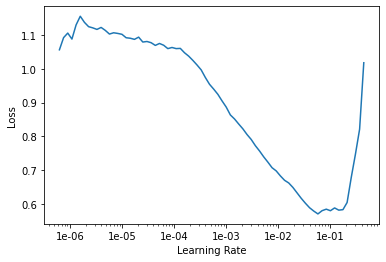

In [13]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-02

In [15]:
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.411958,0.650550,0.923469,03:36
1,0.360909,0.193048,0.954082,03:35
2,0.246247,0.156051,0.943878,03:35


In [16]:
preds, y = learn.get_preds(DatasetType.Test)

In [0]:
pred = preds[:, 1]

In [0]:
list_test = test_csv2['image'].tolist()

In [0]:
subm = pd.DataFrame({'image': list_test, 'target': pred})

In [0]:
subm.to_csv('submit.csv', index=None)

In [0]:
from google.colab import files

files.download('submit.csv')